In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
trainset = pd.read_csv("trainset.csv")
testset = pd.read_csv("testset.csv")

In [3]:
trainset.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome',
       'nr.employed', 'Subscribed'],
      dtype='object')

In [4]:
testset.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome',
       'nr.employed', 'Subscribed'],
      dtype='object')

In [5]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29271 non-null  object 
 2   marital      29271 non-null  object 
 3   education    29271 non-null  object 
 4   housing      29271 non-null  object 
 5   loan         29271 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [6]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11917 entries, 0 to 11916
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          11917 non-null  int64  
 1   job          11917 non-null  object 
 2   marital      11917 non-null  object 
 3   education    11917 non-null  object 
 4   housing      11917 non-null  object 
 5   loan         11917 non-null  object 
 6   contact      11917 non-null  object 
 7   month        11917 non-null  object 
 8   day_of_week  11917 non-null  object 
 9   duration     11917 non-null  int64  
 10  campaign     11917 non-null  int64  
 11  pdays        11917 non-null  int64  
 12  poutcome     11917 non-null  object 
 13  nr.employed  11917 non-null  float64
 14  Subscribed   11917 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1.4+ MB


In [7]:
trainset.shape

(29271, 15)

In [8]:
testset.shape

(11917, 15)

In [9]:
#Printing the first 5 rows of the trainset dataset
trainset.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


In [10]:
#Printing the first 5 rows of the testset dataset
testset.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,62,retired,married,university.degree,no,no,cellular,oct,fri,717,2,999,nonexistent,5017.5,yes
1,49,admin.,single,high.school,yes,no,cellular,oct,fri,136,2,999,nonexistent,5017.5,yes
2,36,admin.,married,university.degree,no,no,cellular,oct,fri,342,1,999,failure,5017.5,yes
3,70,retired,married,basic.4y,yes,no,cellular,oct,mon,131,1,999,nonexistent,5017.5,yes
4,60,retired,married,basic.4y,no,no,cellular,oct,mon,98,1,999,nonexistent,5017.5,yes


In [11]:
# Replace 'NaN' in all columns with '1'
trainset[['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome',
       'nr.employed', 'Subscribed']] = trainset[['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome',
       'nr.employed', 'Subscribed']].replace(['NaN'],1)

In [12]:
# Change the unit of 'duration' from seconds to minutes
trainset['duration'] = trainset['duration'].apply(lambda n:n/60).round(2)

In [13]:
# Drop rows which hasa 'duration' < 5s
condition1 = (trainset['duration']<5/60)
trainset = trainset.drop(trainset[condition1].index, axis = 0, inplace = False)

In [14]:
# Drop customer values with 'other' education
condition2 = (trainset['education'] == 'other')
trainset = trainset.drop(trainset[condition2].index, axis = 0, inplace = False)

In [15]:
# Check for null values in trainset dataset
trainset.isnull().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
poutcome       0
nr.employed    0
Subscribed     0
dtype: int64

In [16]:
# Check for null values in testset dataset
testset.isnull().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
poutcome       0
nr.employed    0
Subscribed     0
dtype: int64

In [17]:
#Value count of 'Subscribed' feature
trainset['Subscribed'].value_counts()

no     26051
yes     3196
Name: Subscribed, dtype: int64

<AxesSubplot:xlabel='Subscribed', ylabel='count'>

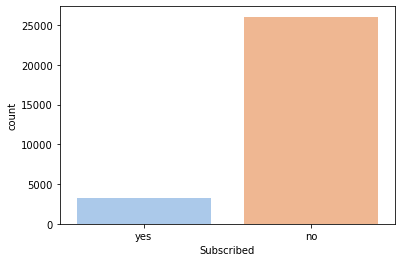

In [18]:
# Plotting the 'Subscribed' value count
sns.set_palette("pastel")
sns.countplot(data=trainset, x='Subscribed')

In [19]:
#Normalizing the value count table of 'Subscribed' feature
trainset['Subscribed'].value_counts(normalize=True)

no     0.890724
yes    0.109276
Name: Subscribed, dtype: float64

In [20]:
#Value count table for job feature
trainset['job'].value_counts()

admin.           7306
blue-collar      6690
technician       5090
services         2832
management       2110
entrepreneur     1107
self-employed    1035
retired           946
housemaid         853
unemployed        705
student           313
unknown           260
Name: job, dtype: int64

<AxesSubplot:xlabel='count', ylabel='job'>

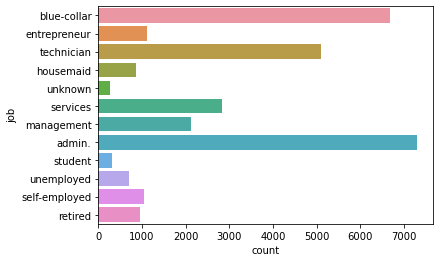

In [21]:
sns.countplot(y='job', data=trainset)

In [22]:
trainset['marital'].value_counts()

married     18368
single       7465
divorced     3363
unknown        51
Name: marital, dtype: int64

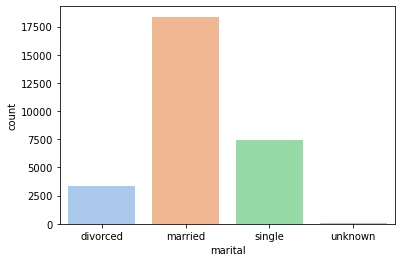

In [23]:
sns.countplot(data=trainset, x='marital');

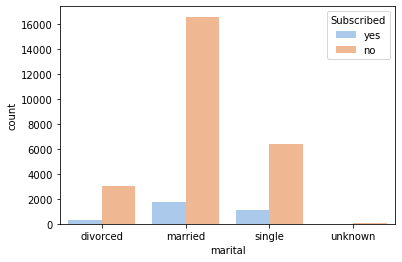

In [24]:
sns.countplot(data=trainset, x='marital', hue='Subscribed');

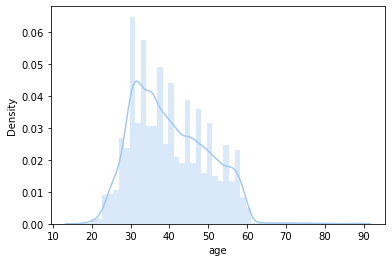

In [25]:
sns.distplot(trainset['age']);

In [26]:
#job vs subscribed
pd.crosstab(trainset['job'],trainset['Subscribed'])

Subscribed,no,yes
job,,
admin.,6401,905
blue-collar,6135,555
entrepreneur,996,111
housemaid,792,61
management,1874,236
retired,740,206
self-employed,921,114
services,2574,258
student,176,137


In [27]:
job = pd.crosstab(trainset['job'],trainset['Subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

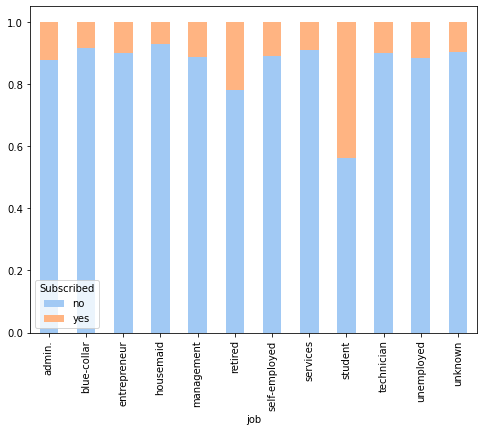

In [28]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

In [29]:
#Marital status vs subscribed
pd.crosstab(trainset['marital'], trainset['Subscribed'])

Subscribed,no,yes
marital,,
divorced,3046,317
married,16587,1781
single,6376,1089
unknown,42,9


In [30]:
marital = pd.crosstab(trainset['marital'], trainset['Subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

Subscribed,no,yes
marital,,
divorced,0.905739,0.094261
married,0.903038,0.096962
single,0.854119,0.145881
unknown,0.823529,0.176471


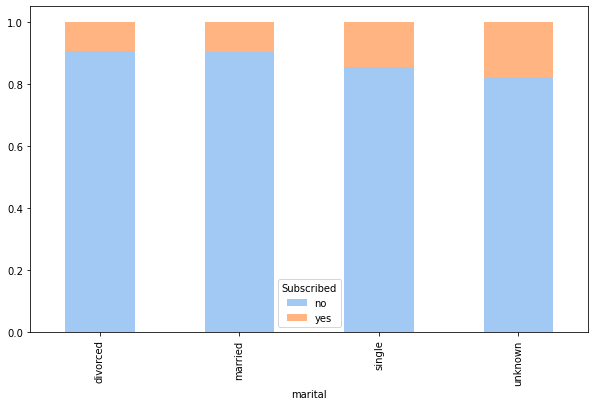

In [31]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

<AxesSubplot:xlabel='count', ylabel='education'>

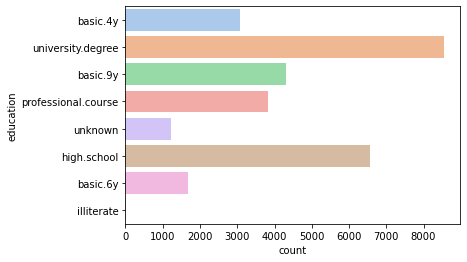

In [32]:
sns.countplot(y='education', data=trainset)

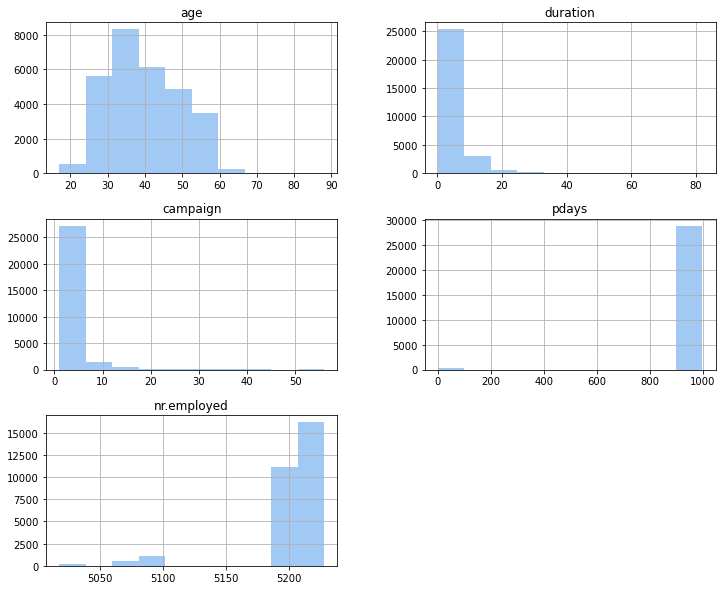

In [33]:
dist=trainset.hist(figsize=(12,10))

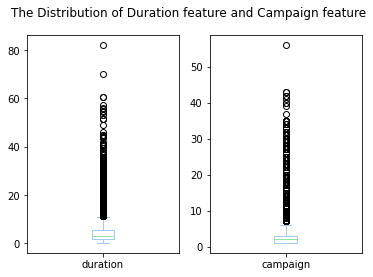

In [34]:
dist_duration_campaign = trainset[['duration','campaign']].plot(kind = 'box',subplots = True, layout = (1,2),sharex = False, sharey = False,title='The Distribution of Duration feature and Campaign feature')
plt.show()

In [35]:
# Converting the "Subscribed" variables into 0s and 1s
trainset['Subscribed'].replace('no', 0,inplace=True)
trainset['Subscribed'].replace('yes', 1,inplace=True)

In [36]:
trainset['Subscribed']

0        1
1        1
2        1
3        1
4        1
        ..
29266    0
29267    0
29268    0
29269    0
29270    0
Name: Subscribed, Length: 29247, dtype: int64

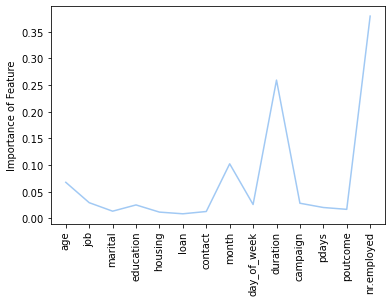

In [37]:
#Displaying importance of each feature. Month, Duration, and nr.employed are the most important.
from sklearn.ensemble import RandomForestClassifier
X = trainset.copy()


y = trainset.Subscribed
X = X.drop('Subscribed', axis = 1)
X = X.fillna(-999)


for c in trainset.columns[trainset.dtypes == 'object']:
    X[c] = X[c].factorize()[0]
    
rf = RandomForestClassifier()
rf.fit(X,y)

plt.plot(rf.feature_importances_)
plt.ylabel('Importance of Feature')
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=90);

In [38]:
#Correlation matrix
tcorr = trainset.corr()
tcorr

,age,duration,campaign,pdays,nr.employed,Subscribed
age,1.000000,-0.023417,0.011512,-0.010742,-0.004517,-0.018003
duration,-0.023417,1.000000,-0.073913,-0.038213,-0.161673,0.466078
campaign,0.011512,-0.073913,1.000000,0.036049,0.123570,-0.065078
pdays,-0.010742,-0.038213,0.036049,1.000000,0.351107,-0.268134
nr.employed,-0.004517,-0.161673,0.123570,0.351107,1.000000,-0.636409
Subscribed,-0.018003,0.466078,-0.065078,-0.268134,-0.636409,1.000000


<AxesSubplot:>

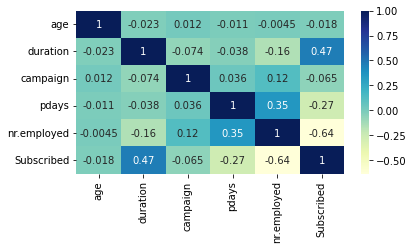

In [76]:
fig,ax= plt.subplots()
fig.set_size_inches(6,3)
sns.heatmap(tcorr, annot=True, cmap='YlGnBu')

In [40]:
target_variable = trainset['Subscribed']
trainset = trainset.drop('Subscribed', axis=1)

In [41]:
#creating dummy values on the trainset dataset
trainset = pd.get_dummies(trainset)
trainset.head()

,age,duration,campaign,pdays,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,41,26.25,1,999,5191.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,49,17.37,1,999,5191.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,49,24.45,1,999,5191.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,41,9.65,1,999,5191.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,45,7.68,1,999,5191.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(trainset, target_variable, test_size=0.2, random_state=12)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logr = LogisticRegression()

In [46]:
logr.fit(X_train,y_train)

LogisticRegression()

In [47]:
pre = logr.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [49]:
accuracy_score(y_test,pre)

0.9165811965811966

In [70]:
precision_score(y_test,pre)

0.6896551724137931

In [71]:
recall_score(y_test,pre)

0.4120443740095087

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
c = DecisionTreeClassifier(max_depth=4, random_state=0)

In [52]:
c.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [53]:
pred = c.predict(X_test)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [54]:
accuracy_score(y_test,pred)

0.9570940170940171

In [55]:
from sklearn.metrics import confusion_matrix
trix = confusion_matrix(y_test, pred)
print(trix)

[[5131   88]
 [ 163  468]]


In [56]:
# Accuracy score (TP+TN)/(TP+TN+FN+TN)
print((trix[0,0] + trix[1,1])/(trix[0,0]+trix[0,1]+trix[1,0]+trix[1,1]))

0.9570940170940171


In [57]:
# Precision using the formula TP/TP+TN
print('Precision: ',trix[0,0]/(trix[0,0]+trix[0,1]))

Precision:  0.9831385322858786


In [58]:
# Recall using the formula TP/TP+FN
print('Recall: ',trix[0,0]/(trix[0,0]+trix[1,0]))

Recall:  0.9692104268983756


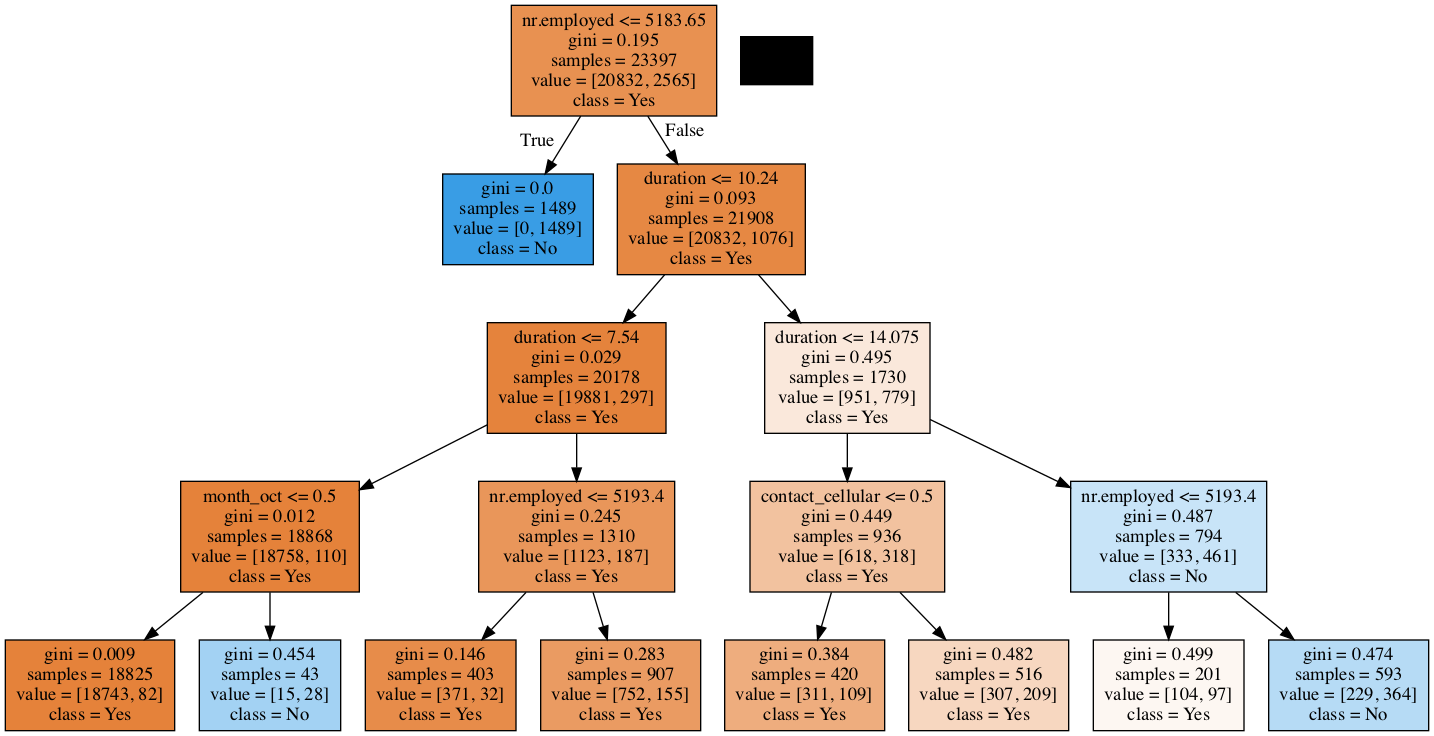

In [59]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

feature_cols = ['age', 'duration', 'campaign', 'pdays', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

export_graphviz(c.fit(X_train, y_train),feature_names=feature_cols,  
                   class_names=['Yes','No'],filled=True, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("dtree.png")
Image(graph.create_png())

In [60]:
testset = testset.drop('Subscribed', axis=1)

In [61]:
testset = pd.get_dummies(testset)
testset.head()

,age,duration,campaign,pdays,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,62,717,2,999,5017.5,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1,49,136,2,999,5017.5,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,36,342,1,999,5017.5,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,70,131,1,999,5017.5,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,60,98,1,999,5017.5,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [62]:
test_predict = c.predict(testset)
test_predict

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
results = pd.DataFrame()

In [64]:
results = testset
results['Subscribed_Results'] = test_predict

In [65]:
results['Subscribed_Results']

0        1
1        1
2        1
3        1
4        1
        ..
11912    1
11913    1
11914    1
11915    1
11916    1
Name: Subscribed_Results, Length: 11917, dtype: int64

In [66]:
results['Subscribed_Results'].replace(0,'no',inplace=True)
results['Subscribed_Results'].replace(1,'yes',inplace=True)

In [67]:
results['Subscribed_Results']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11912    yes
11913    yes
11914    yes
11915    yes
11916    yes
Name: Subscribed_Results, Length: 11917, dtype: object

In [68]:
results.to_csv('result_file.csv', header=True, index=False)